## Q2

# Medical Cost Personal Insurance Project

### Problem Statement

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.

#### To predict :
Insurance cost

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
#Importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Columns

•	age: age of primary beneficiary
    
•	sex: insurance contractor gender, female, male
    
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
    
•	children: Number of children covered by health insurance / Number of dependents
    
•	smoker: Smoking
    
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    
•	charges: Individual medical costs billed by health insurance


### Exploratory Data Analysis(EDA)

In [3]:
#Checking the shape
df.shape

(1338, 7)

It shows the size of our dataset: 1338 rows and 7 columns out of which 6 columns are our features and 1 column is our target variable or label.

In [4]:
#Checking the columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

It shows the column names in the dataset.

In [5]:
#Checking the data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Here, we can see our data set has different data types such as int( 2 values), float( 2 values) and object( 3 values).

In [6]:
#Checking for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see there are no null values present right now. Let's move ahead.  

<Axes: >

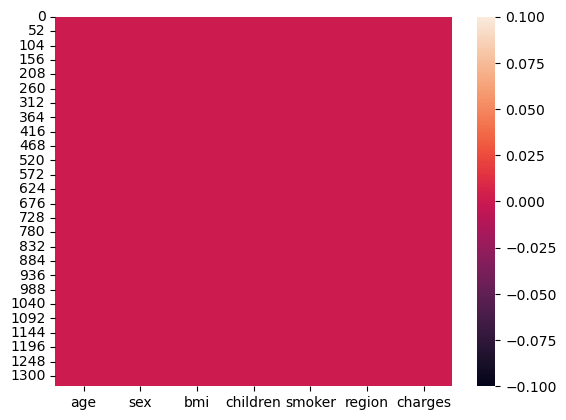

In [7]:
#Let's visualize it using heatmap
sns.heatmap(df.isna())

As we can see the above figure is whole red in colour, that means there are no null values present in our dataset.

In [8]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The info() method gives the information about no. of columns, rows, column names, non-null count, data types and memory usage.

In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

We can see the unique values in each column.

In [10]:
#Checking the value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

We can see that there are no missing values as well as white spaces present in our dataset. Let's move ahead.

In [11]:
#Checking the description 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here, we can see the describe() method gives information about the count of values in the dataset, mean values, standard deviation, min, 25% quantile, 50% quantile, 75% quantile and max values in the dataset. It works only on numerical data and not on categorical data.

In [12]:
#Checking for categorical columns
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical columns:", cat_col)
print("\n")


Categorical columns: ['sex', 'smoker', 'region']




We can see there are many object data present in our dataset. Let's change it to numerical.

In [13]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
df['sex'] = df['sex'].map({'female':0, 'male':1})
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [15]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df['smoker'] = df['smoker'].map({'yes':0, 'no':1})
df['smoker']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64

In [17]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
df['region'] = df['region'].map({'southwest':0, 'southeast':1, 'northeast':2, 'northwest':3})
df['region']

0       0
1       1
2       1
3       3
4       3
       ..
1333    3
1334    2
1335    1
1336    0
1337    3
Name: region, Length: 1338, dtype: int64

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


We have successfully converted our object data to numerical data. Great! Let's move ahead.

Charges is our target variable or label.

In [20]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


The data looks perfect.

In [21]:
#Checking unique values in target data
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

### Data Visualization

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


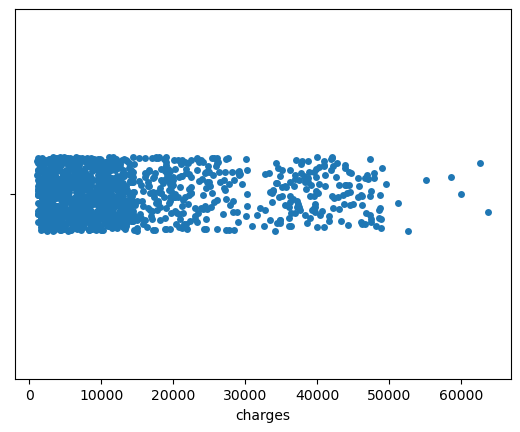

In [22]:
#Visualize the no. of churned customer
ax = sns.stripplot(x='charges', data=df)
print(df['charges'].value_counts())
plt.show()

Here, we can see most of the insurance charges are in the range of 1000 to 50000. And a least are above 50000.

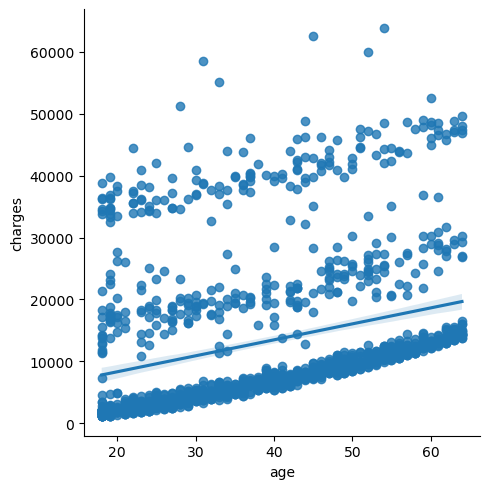

In [23]:
sns.lmplot(x='age', y='charges', data=df, palette='colorblind')

Here, we can see a slight positive relation between age and charges.

<Axes: xlabel='sex', ylabel='charges'>

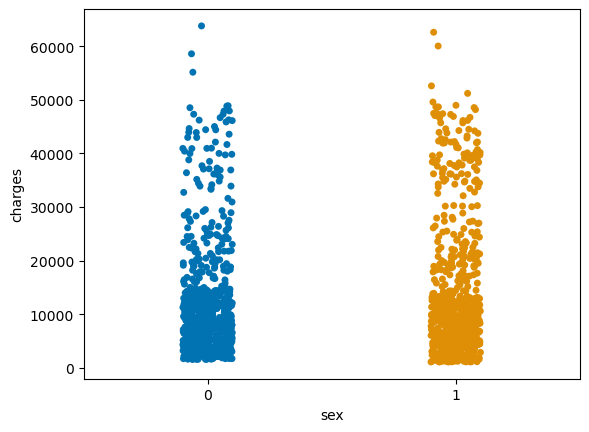

In [24]:
sns.stripplot(x='sex', y='charges', data=df, palette='colorblind')

We can see no difference here.

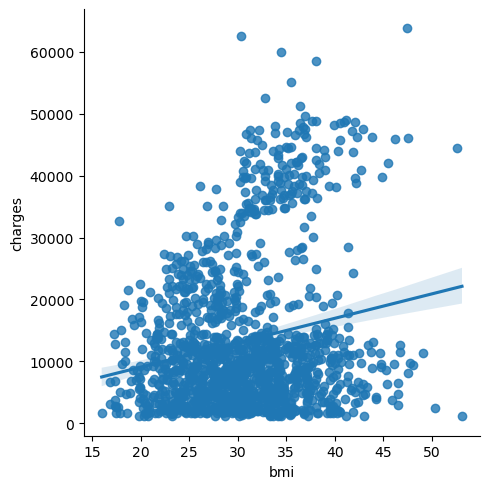

In [25]:
sns.lmplot(x='bmi', y='charges', data=df, palette='colorblind')

There is a little dependency of charges on bmi.

<Axes: xlabel='children', ylabel='charges'>

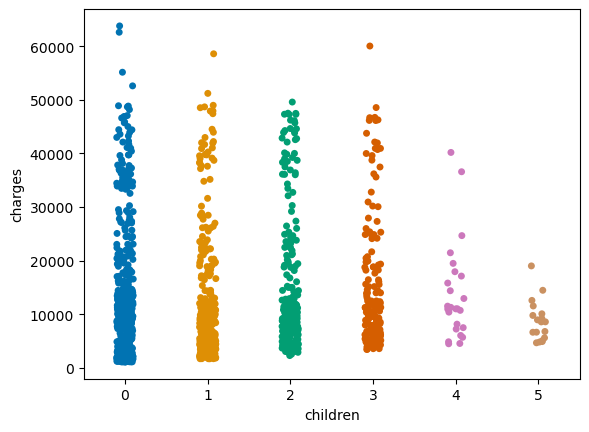

In [26]:
sns.stripplot(x='children', y='charges', data=df, palette='colorblind')

Here, we notice that most of the children are dependent on insurance.

<Axes: xlabel='smoker', ylabel='charges'>

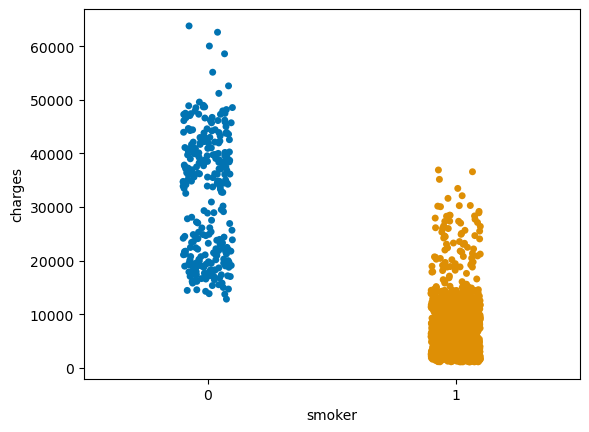

In [27]:
sns.stripplot(x='smoker', y='charges', data=df, palette='colorblind')

Here, we see that those who smoke have high insurance charges than who don't smoke.

<Axes: xlabel='region', ylabel='charges'>

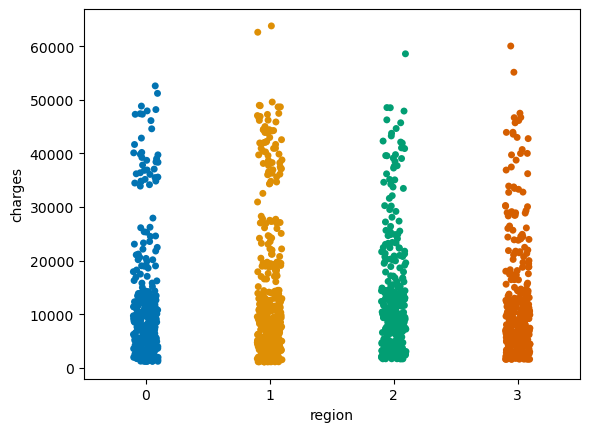

In [28]:
sns.stripplot(x='region', y='charges', data=df, palette='colorblind')

There is no effect on charges regarding the region.

#### Checking for outliers

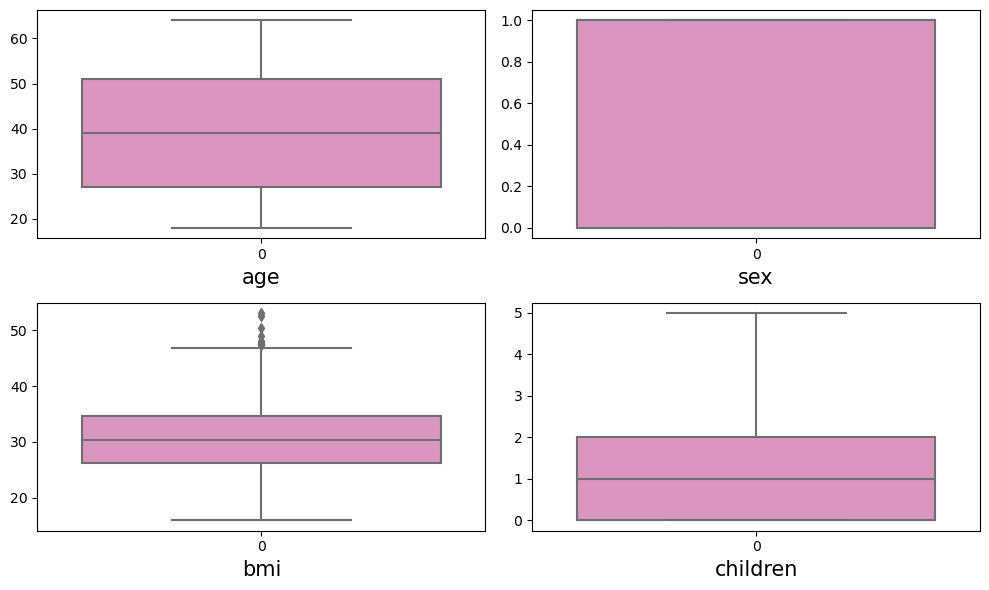

In [29]:
#Checking for outliers by box plot
plt.figure(figsize= (10, 6), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()    

In [30]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.037853
charges     1.515880
dtype: float64

The children column contains some skewness. Let's remove it. As charges is our target variable there is no need to remove skewness.

In [31]:
#Removing skewness by cube root method
df["children"] = np.cbrt(df["children"])

In [32]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children   -0.097116
smoker     -1.464766
region      0.037853
charges     1.515880
dtype: float64

We have reduced the skewness. Great!

In [33]:
#Checking for correlation
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.048919,0.025019,-0.003243,0.299008
sex,-0.020856,1.000000,0.046371,0.016183,-0.076185,-0.007974,0.057292
bmi,0.109272,0.046371,1.000000,0.016515,-0.003750,-0.156686,0.198341
children,0.048919,0.016183,0.016515,1.000000,-0.011829,0.008107,0.072756
smoker,0.025019,-0.076185,-0.003750,-0.011829,1.000000,0.013246,-0.787251
region,-0.003243,-0.007974,-0.156686,0.008107,0.013246,1.000000,-0.011741
charges,0.299008,0.057292,0.198341,0.072756,-0.787251,-0.011741,1.000000


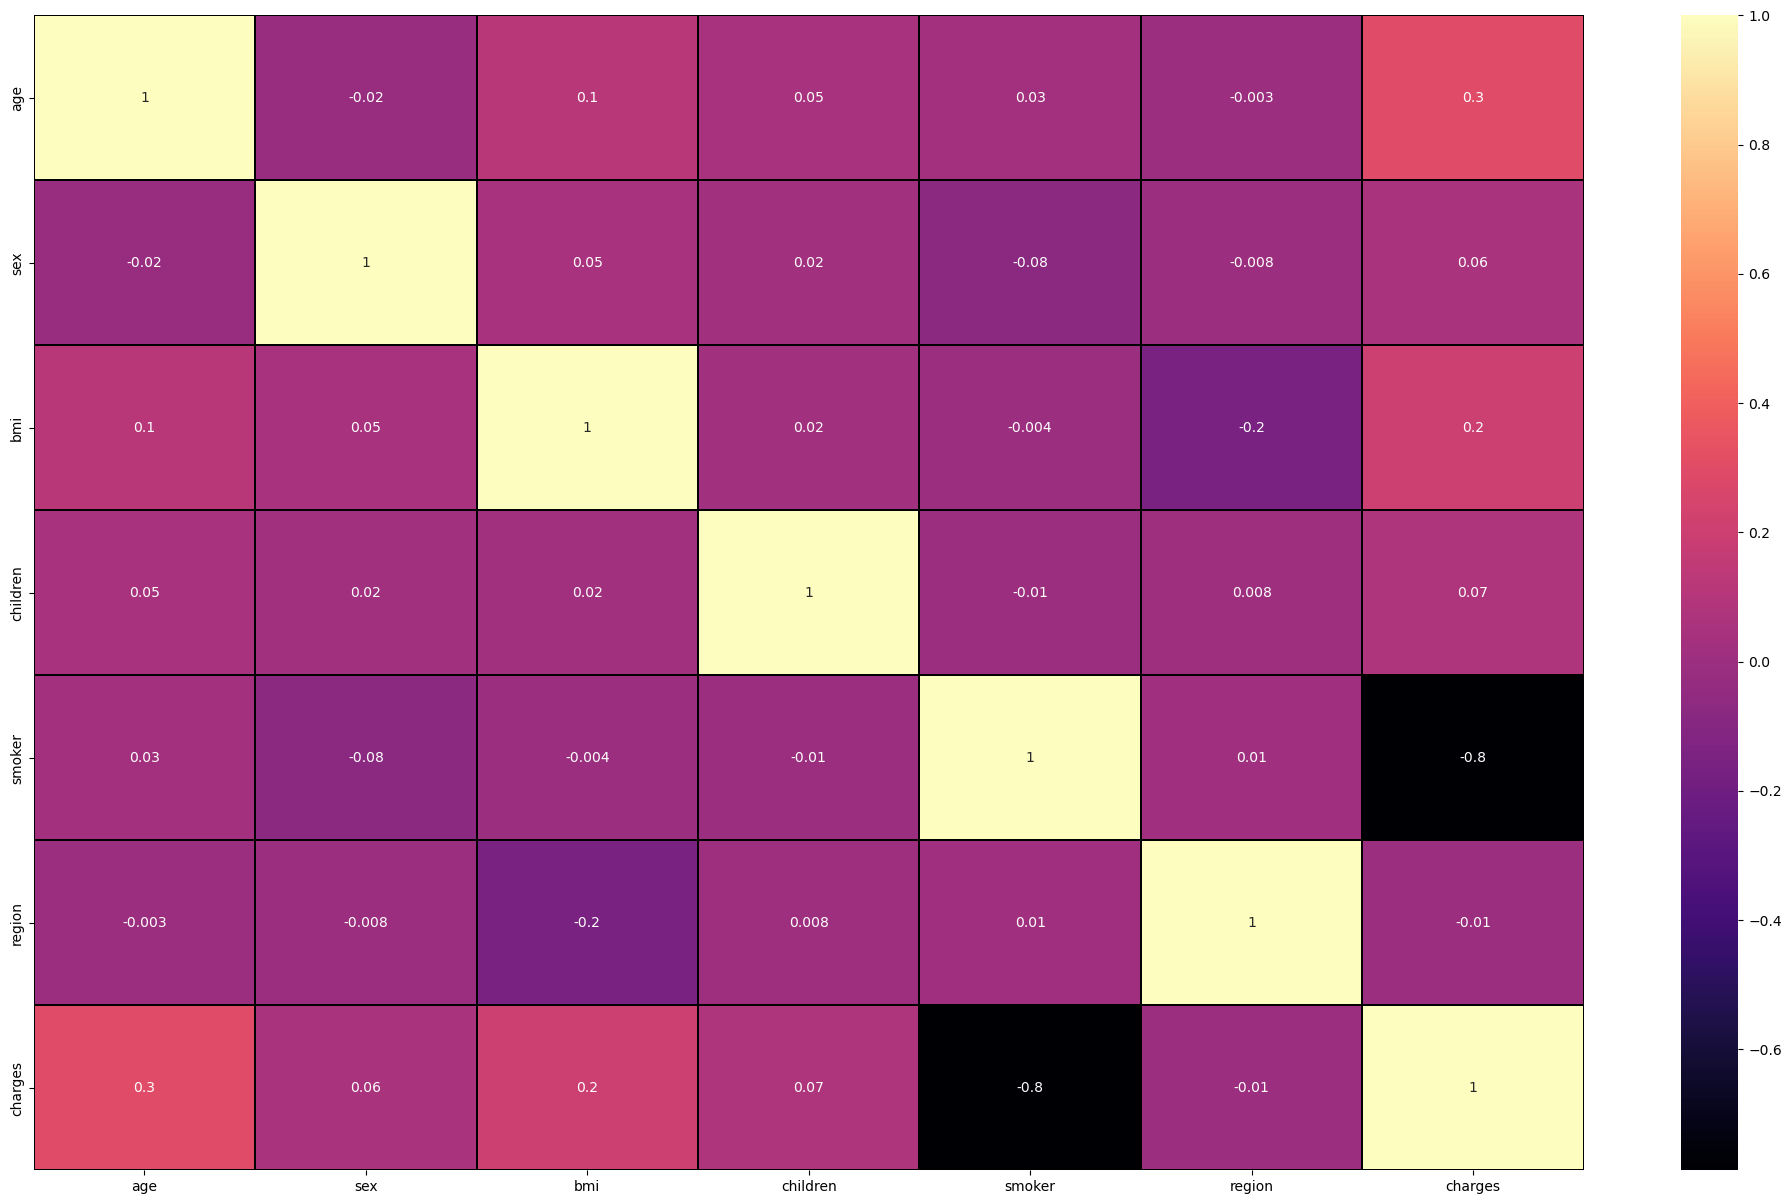

In [34]:
#Plotting heatmap for correlation
plt.figure(figsize = (25, 15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "magma")
#plt.yticks(rotation=0)
plt.show()

Everything looks good. No need to remove anything. Let's move ahead.

### Separating features and label

In [35]:
x = df.drop("charges", axis=1)
y = df["charges"]

In [36]:
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


### Feature scaling using standard scaler

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-1.117604,-1.970587,-1.343746
1,-1.509965,0.989591,0.509621,0.502009,0.507463,-0.438898
2,-0.797954,0.989591,0.383307,1.218282,0.507463,-0.438898
3,-0.441948,0.989591,-1.305531,-1.117604,0.507463,1.370796
4,-0.513149,0.989591,-0.292556,-1.117604,0.507463,1.370796
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.218282,0.507463,1.370796
1334,-1.509965,-1.010519,0.206139,-1.117604,0.507463,0.465949
1335,-1.509965,-1.010519,1.014878,-1.117604,0.507463,-0.438898
1336,-1.296362,-1.010519,-0.797813,-1.117604,0.507463,-1.343746


We have scaled the data using standard scaler to reduce biasness.

In [38]:
#Checking for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF Values,Features
0,1.015872,age
1,1.008835,sex
2,1.040327,bmi
3,1.003051,children
4,1.006701,smoker
5,1.025642,region


Everything is perfect with no multicollinearity. Now let's go ahead and train our model.

### Model Training

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

In [40]:
#Finding the best random state
maxR2 = 0
maxRS = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxR2:
        maxR2=acc
        maxRS=i
print("Maximum r2 score is ", maxR2, "on Random_state ", maxRS)

Maximum r2 score is  0.8054616585444744 on Random_state  367


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=maxRS)

In [42]:
x_train

,age,sex,bmi,children,smoker,region
453,-1.367563,0.989591,-0.152298,-1.117604,0.507463,1.370796
750,-0.157143,-1.010519,-0.699387,-1.117604,-1.970587,-0.438898
650,0.697271,-1.010519,1.971257,0.922980,0.507463,-0.438898
1089,1.195680,0.989591,-1.404778,-1.117604,0.507463,-1.343746
999,-0.228344,-1.010519,-0.619825,-1.117604,0.507463,1.370796
...,...,...,...,...,...,...
1278,-0.014740,0.989591,-0.121130,0.502009,-1.970587,0.465949
5,-0.584350,-1.010519,-0.807656,-1.117604,0.507463,-0.438898
192,-1.011557,0.989591,-0.807656,-1.117604,0.507463,-0.438898
1179,-0.584350,0.989591,-0.139995,-1.117604,-1.970587,-0.438898


In [43]:
y_train

453      1769.53165
750     19539.24300
650      9800.88820
1089    10577.08700
999      5267.81815
           ...     
1278    22462.04375
5        3756.62160
192      2137.65360
1179    19350.36890
430     23082.95533
Name: charges, Length: 1003, dtype: float64

In [44]:
#Importing differenet regression models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### Model Building

In [45]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_lr))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lr)))

R2 Score: 0.8054616585444744
R2 Score on training data: 73.03543202946543
Mean Absolute Error: 3832.302454759185
Mean Squared Error: 29167449.146376185
Root Mean Squared Error: 5400.689691731621


In [46]:
from sklearn.svm import SVR
svc = SVR()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
pred_train = svc.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_svc))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svc))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svc))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_svc)))

R2 Score: -0.11272475436252671
R2 Score on training data: -9.93218561199416
Mean Absolute Error: 8188.767159541813
Mean Squared Error: 166832627.66585633
Root Mean Squared Error: 12916.370529907244


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
pred_train = rf.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_rf))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rf))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_rf)))


R2 Score: 0.870686585796623
R2 Score on training data: 97.39821977878142
Mean Absolute Error: 2560.9116106875913
Mean Squared Error: 19388169.984905295
Root Mean Squared Error: 4403.199971033032


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred_gb = gb.predict(x_test)
pred_train = gb.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_gb))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_gb))
print('Mean Squared Error:', mean_squared_error(y_test, pred_gb))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_gb)))

R2 Score: 0.8964994290493064
R2 Score on training data: 89.74078917953388
Mean Absolute Error: 2373.846761691295
Mean Squared Error: 15518008.518209813
Root Mean Squared Error: 3939.290357184884


In [49]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_KNN))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_KNN))
print('Mean Squared Error:', mean_squared_error(y_test, pred_KNN))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_KNN)))

R2 Score: 0.8452692116160745
R2 Score on training data: 86.00534518082674
Mean Absolute Error: 3017.105506071642
Mean Squared Error: 23199038.1320209
Root Mean Squared Error: 4816.537981997121


In [50]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
pred_train = dt.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_dt))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dt))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_dt)))

R2 Score: 0.6625183708320976
R2 Score on training data: 99.82078595370243
Mean Absolute Error: 3331.418243447762
Mean Squared Error: 50599168.179098226
Root Mean Squared Error: 7113.309228418108


In [51]:
ridge = Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_ridge))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ridge))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ridge))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score: 0.805361992274749
R2 Score on training data: 73.0353589245537
Mean Absolute Error: 3834.285763431118
Mean Squared Error: 29182392.271891046
Root Mean Squared Error: 5402.072960622713


In [52]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_lasso))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score: 0.8054606252893031
R2 Score on training data: 73.03542787151078
Mean Absolute Error: 3832.17664273023
Mean Squared Error: 29167604.064000327
Root Mean Squared Error: 5400.704034105213


From the above data we see that Gradient Boosting Regressor gives the best result i.e. 89.63%.

### Prediction on test data

In [53]:
pred_lr = lr.predict(x_test)
pred_sv = svc.predict(x_test)
pred_rf = rf.predict(x_test)
pred_gb = gb.predict(x_test)
pred_KNN = KNN.predict(x_test)
pred_dt = dt.predict(x_test)
pred_ridge = ridge.predict(x_test)
pred_lasso = lasso.predict(x_test)

In [54]:
df1 = pd.DataFrame({"Actual": y_test, "LR": pred_lr, "SVM":pred_sv, "RFR": pred_rf, "GB": pred_gb, "KNN": pred_KNN, "DT": pred_dt, "Ridge": pred_ridge, "Lasso": pred_lasso})

In [55]:
df1

,Actual,LR,SVM,RFR,GB,KNN,DT,Ridge,Lasso
1107,10493.94580,11064.916556,9305.905168,17326.371778,12732.206878,14830.710240,30284.64294,11066.502043,11062.238153
1063,6548.19505,8118.227770,9257.467662,6597.628618,7723.253294,6815.437460,6748.59120,8124.332942,8117.782798
1246,9101.79800,9118.101333,9282.500032,10399.837484,9935.568241,10233.909746,26140.36030,9122.216464,9118.660023
721,11264.54100,14324.160964,9311.932543,15207.821488,13980.372321,13916.821316,12363.54700,14325.045909,14324.447894
1330,12629.16560,12221.120719,9319.637622,16972.243484,15030.088615,14555.893922,25992.82104,12221.931983,12220.206476
...,...,...,...,...,...,...,...,...,...
129,6082.40500,9654.181026,9264.911270,6532.435765,6826.551418,8638.725674,6356.27070,9659.392778,9655.912960
510,11763.00090,13592.189719,9319.200061,12260.439122,13541.251294,12567.923918,11946.62590,13592.978757,13591.643034
122,2257.47525,2752.708241,9231.405997,3160.120372,3407.519821,2557.246990,2261.56880,2761.520747,2753.013518
112,4646.75900,6619.872578,9260.590746,13504.366371,4845.386836,7853.262730,20420.60465,6627.012400,6624.116757


### Model Evaluation

#### Let's check the cross validation score

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
score = cross_val_score(lr, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_lr) - score.mean())*100)

[0.76134482 0.70762715 0.77711672 0.73359056 0.75420855]
0.7467775597668844
Difference between R2 score and cross validation score is: 5.868409877758996


In [58]:
score = cross_val_score(svc, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_sv) - score.mean())*100)

[-0.11024609 -0.1071213  -0.07627649 -0.10121462 -0.10249223]
-0.09947014527103884
Difference between R2 score and cross validation score is: -1.3254609091487874


In [59]:
score = cross_val_score(rf, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_rf) - score.mean())*100)

[0.85267657 0.77779606 0.87223207 0.82893577 0.8519466 ]
0.8367174129952929
Difference between R2 score and cross validation score is: 3.396917280133005


In [60]:
score = cross_val_score(gb, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_gb) - score.mean())*100)

[0.87418711 0.79625913 0.89302407 0.85166214 0.85933246]
0.8548929807919533
Difference between R2 score and cross validation score is: 4.160644825735305


In [61]:
score = cross_val_score(KNN, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_KNN) - score.mean())*100)

[0.82084737 0.7579932  0.84324954 0.79706275 0.80811969]
0.8054545091513606
Difference between R2 score and cross validation score is: 3.981470246471386


In [62]:
score = cross_val_score(dt, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_dt) - score.mean())*100)

[0.72088477 0.65563212 0.7101848  0.73043978 0.68297261]
0.7000228152873726
Difference between R2 score and cross validation score is: -3.750444445527501


In [63]:
score = cross_val_score(ridge, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_ridge) - score.mean())*100)

[0.76135338 0.7077355  0.77699981 0.73364675 0.75418018]
0.7467831247459443
Difference between R2 score and cross validation score is: 5.85788675288047


In [64]:
score = cross_val_score(lasso, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_lasso) - score.mean())*100)

[0.76134918 0.70766121 0.77709923 0.73358757 0.75421629]
0.7467826978970835
Difference between R2 score and cross validation score is: 5.867792739221955


From R2 score we notice that Gradient Boosting Regressor gives best score of 85%.

### Hyper parameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [69]:
param = {"n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

In [70]:
grid = GridSearchCV(GradientBoostingRegressor(), param, cv=5, n_jobs= -1)          
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [71]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [73]:
model = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=500)

In [74]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('R2 score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.9045334272280244
Mean Absolute Error: 2297.359190152598
Mean Squared Error: 14313458.13720737
Root Mean Squared Error: 3783.313116463845


We got R2 score 90%. That's great!

In this basis, Gradient Boosting Regressor works best.

Let's go ahead and save the model.

### Saving the model

In [75]:
import pickle

In [77]:
filename = "cost_insurance.pkl"
pickle.dump(model, open(filename, 'wb'))

In [79]:
loaded_model = pickle.load(open("cost_insurance.pkl", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

90.45334272280245


In [80]:
final = pd.DataFrame([loaded_model.predict(x_test)[:], (y_test)[:]], index=['Predicted', 'Original'])
final

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
Predicted,12163.563942,8030.882678,9761.814432,14064.52873,14554.432259,2801.822239,16873.656149,7556.692407,7622.088677,11753.23596,...,20617.568393,4038.059856,12485.036779,10473.456539,9803.791469,7338.293547,13495.850102,3838.619751,5244.662157,4695.628423
Original,10493.945800,6548.195050,9101.798000,11264.54100,12629.165600,1705.624500,13919.822900,6311.952000,6770.192500,9541.69555,...,18328.238100,25081.767840,10594.501550,8782.469000,7518.025350,6082.405000,11763.000900,2257.475250,4646.759000,2331.519000


We have successfully completed the model with 90% R2 score. Great!